In [17]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [420]:
test1 = pd.read_csv("soluciones.csv")
test1
#test1=test1.drop(test1.index[34])
t=test1
#t=t.sort_values('n')
t['dist-costo']=t["costo-sol"]-t["costo-opt"]
t['dist-k']=t["k-sol"]-t["k-opt"]
t['%-desvio-costo']=(t["costo-sol"]-t['costo-opt'])*100/t["costo-opt"]
s=pd.read_csv("soluciones-sweep.csv")
s['dist-k']=s["k-sol"]-s["k-opt"]
s['dist-costo']=s['costo-sol']-s['costo-opt']
s['%-desvio-costo']=(s["costo-sol"]-s['costo-opt'])*100/s["costo-opt"]
d=pd.concat([t,s],axis=1)
acum_dif_costo=0
cant_desvio=0
for i in range(len(t)):
    acum_dif_costo+=t['dist-costo'][i]
    if(t['%-desvio-costo'][i]>=20):
        cant_desvio += 1
prom_dif_costo = acum_dif_costo/len(t)
cant_desvio
t

KeyError: 'costo-sol'

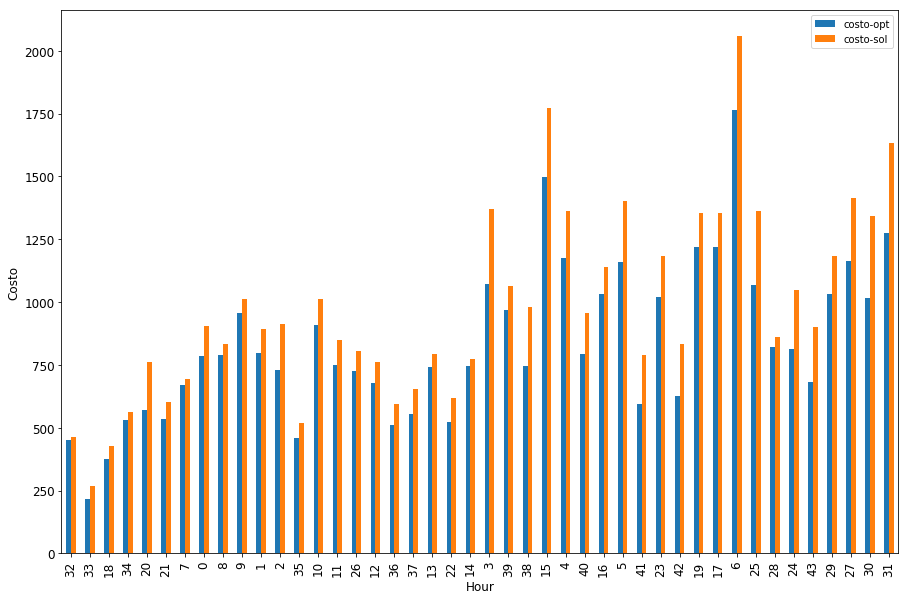

In [403]:
tabla = pd.concat([t['costo-opt'],t['costo-sol']],axis=1)
tabla
ax = t[['costo-opt','costo-sol']].plot(kind='bar', title ="", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Costo", fontsize=12)
plt.show()

Text(0,0.5,'Costo')

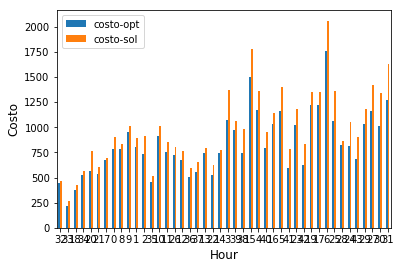

In [394]:
tabla = pd.concat([t['costo-opt'],t['costo-sol']],axis=1)
tabla
ax=tabla.plot.bar(rot=0)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Costo", fontsize=12)

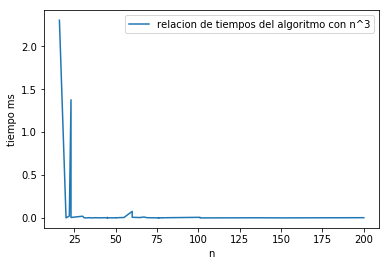

In [342]:

#plt.plot(t['n'],t['tiempo'])
vec_difs=[]
plt.ylabel("tiempo ms")
#plt.ylabel("t / n^3")
plt.xlabel("n")
vec_difs = t['k-sol'] - t['k-opt'] 
vec_difs
t['dist-entre-kopt-y-k-sol'] = vec_difs
rel_n_k = t['n']/t['k-sol']
t['rel-entre-n-y-k'] = rel_n_k
#t= t.drop(columns=['dist-entre-k'])
vec_cub=t['n']*t['n']*t['n']
vec_cub
tdf = pd.DataFrame(t['tiempo'])
rel = t['tiempo']/vec_cub
rel = pd.DataFrame(rel)
plt.plot(t['n'],rel)
plt.legend(['relacion de tiempos del algoritmo con n^3'])
